In [3]:
from selenium import webdriver
import time, os
from selenium.webdriver.common.keys import Keys
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
#from pandas_profiling import ProfileReport

## Get HTML page through Chrome Driver using Selenium

In [4]:
chromedriver = "/Applications/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver
driver = webdriver.Chrome(chromedriver)
driver.get('https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130606&end=20210916')
time.sleep(10)

## Make a beautiful Soup out of the HTML page.

#### Note: before below cell was executed, I scrolled down in the web page that the above cell generated so that driver.page_source returns all the available executed web page script not only what is shown initially

In [5]:
driver.page_source[:1000]
soup = BeautifulSoup(driver.page_source, 'lxml')
table=soup.find('table')
rows=table.find_all("tr")
rows=rows[1:] #to delete first row that has headers
rows[0]

<tr><td style="text-align: left;">Oct 01, 2021</td><td>$43,816.74</td><td>$48,436.01</td><td>$43,320.02</td><td>$48,116.94</td><td>$42,850,641,582</td><td style="text-align: right;">$906,127,699,408</td></tr>

### Getting  data of each row in the table and save it in a dictionary

In [6]:
data_dict={}
    
for row in rows:
    data_per_row=row.find_all("td")
    date=data_per_row[0].text.strip()
    open_price=data_per_row[1].text.strip()
    highest_price=data_per_row[2].text.strip()
    lowest_price=data_per_row[3].text.strip()
    close_price=data_per_row[4].text.strip()
    volume=data_per_row[5].text.strip()
    market_cap=data_per_row[6].text.strip()

    data_dict[date]=[date,open_price,highest_price,lowest_price,close_price,volume,market_cap]

### Convert Dictionary to Data Frame

In [7]:
Bitcoin_df=pd.DataFrame(data_dict).T
Bitcoin_df.columns=['Date','Open_Price','Highest_Price','Lowest_Price','Close_Price','Volume','Market_Cap']
Bitcoin_df.reset_index(drop=True,inplace=True)

In [8]:
Bitcoin_df.tail(3)

Date Open_Price Highest_Price Lowest_Price Close_Price Volume  \
3076  Apr 30, 2013    $144.00       $146.93      $134.05     $139.00     $0   
3077  Apr 29, 2013    $134.44       $147.49      $134.00     $144.54     $0   
3078  Apr 28, 2013    $135.30       $135.98      $132.10     $134.21     $0   

          Market_Cap  
3076  $1,542,813,125  
3077  $1,603,768,865  
3078  $1,488,566,728

In [9]:
Bitcoin_df.head(7)

Date  Open_Price Highest_Price Lowest_Price Close_Price  \
0  Oct 01, 2021  $43,816.74    $48,436.01   $43,320.02  $48,116.94   
1  Sep 30, 2021  $41,551.27    $44,092.60   $41,444.58  $43,790.90   
2  Sep 29, 2021  $41,064.98    $42,545.26   $40,829.67  $41,564.36   
3  Sep 28, 2021  $42,200.90    $42,775.15   $40,931.66  $41,034.54   
4  Sep 27, 2021  $43,234.18    $44,313.25   $42,190.63  $42,235.73   
5  Sep 26, 2021  $42,721.63    $43,919.30   $40,848.46  $43,208.54   
6  Sep 25, 2021  $42,840.89    $42,996.26   $41,759.92  $42,716.59   

            Volume        Market_Cap  
0  $42,850,641,582  $906,127,699,408  
1  $31,141,681,925  $824,619,217,608  
2  $30,602,359,905  $782,651,228,474  
3  $30,214,940,550  $772,639,687,709  
4  $30,980,029,059  $795,216,175,345  
5  $30,661,222,077  $813,490,665,613  
6  $31,604,717,236  $804,192,450,113

In [10]:
type(Bitcoin_df['Date'])

pandas.core.series.Series

### Convert Datatype of date

In [11]:
Bitcoin_df['Date']=pd.to_datetime(Bitcoin_df['Date'])
Bitcoin_df.head(7)

Date  Open_Price Highest_Price Lowest_Price Close_Price  \
0 2021-10-01  $43,816.74    $48,436.01   $43,320.02  $48,116.94   
1 2021-09-30  $41,551.27    $44,092.60   $41,444.58  $43,790.90   
2 2021-09-29  $41,064.98    $42,545.26   $40,829.67  $41,564.36   
3 2021-09-28  $42,200.90    $42,775.15   $40,931.66  $41,034.54   
4 2021-09-27  $43,234.18    $44,313.25   $42,190.63  $42,235.73   
5 2021-09-26  $42,721.63    $43,919.30   $40,848.46  $43,208.54   
6 2021-09-25  $42,840.89    $42,996.26   $41,759.92  $42,716.59   

            Volume        Market_Cap  
0  $42,850,641,582  $906,127,699,408  
1  $31,141,681,925  $824,619,217,608  
2  $30,602,359,905  $782,651,228,474  
3  $30,214,940,550  $772,639,687,709  
4  $30,980,029,059  $795,216,175,345  
5  $30,661,222,077  $813,490,665,613  
6  $31,604,717,236  $804,192,450,113

###  Cleaning Data by removing '$'  and ',' signs

In [12]:
for column in Bitcoin_df.columns:
    print(Bitcoin_df[column].dtype)
    if(Bitcoin_df[column].dtype == 'object'):
        Bitcoin_df[column]=Bitcoin_df[column].str.replace('$','')
        Bitcoin_df[column]=Bitcoin_df[column].str.replace(',','')
        Bitcoin_df[column]=Bitcoin_df[column].astype('float')

datetime64[ns]
object
object
object
object
object
object


/Users/maha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


## Some initial  EDA

In [15]:
EDA_df=Bitcoin_df[['Volume']]
EDA_df.set_index(Bitcoin_df['Date'],inplace=True)
EDA_df.head(3)

Volume
Date                    
2021-10-01  4.285064e+10
2021-09-30  3.114168e+10
2021-09-29  3.060236e+10

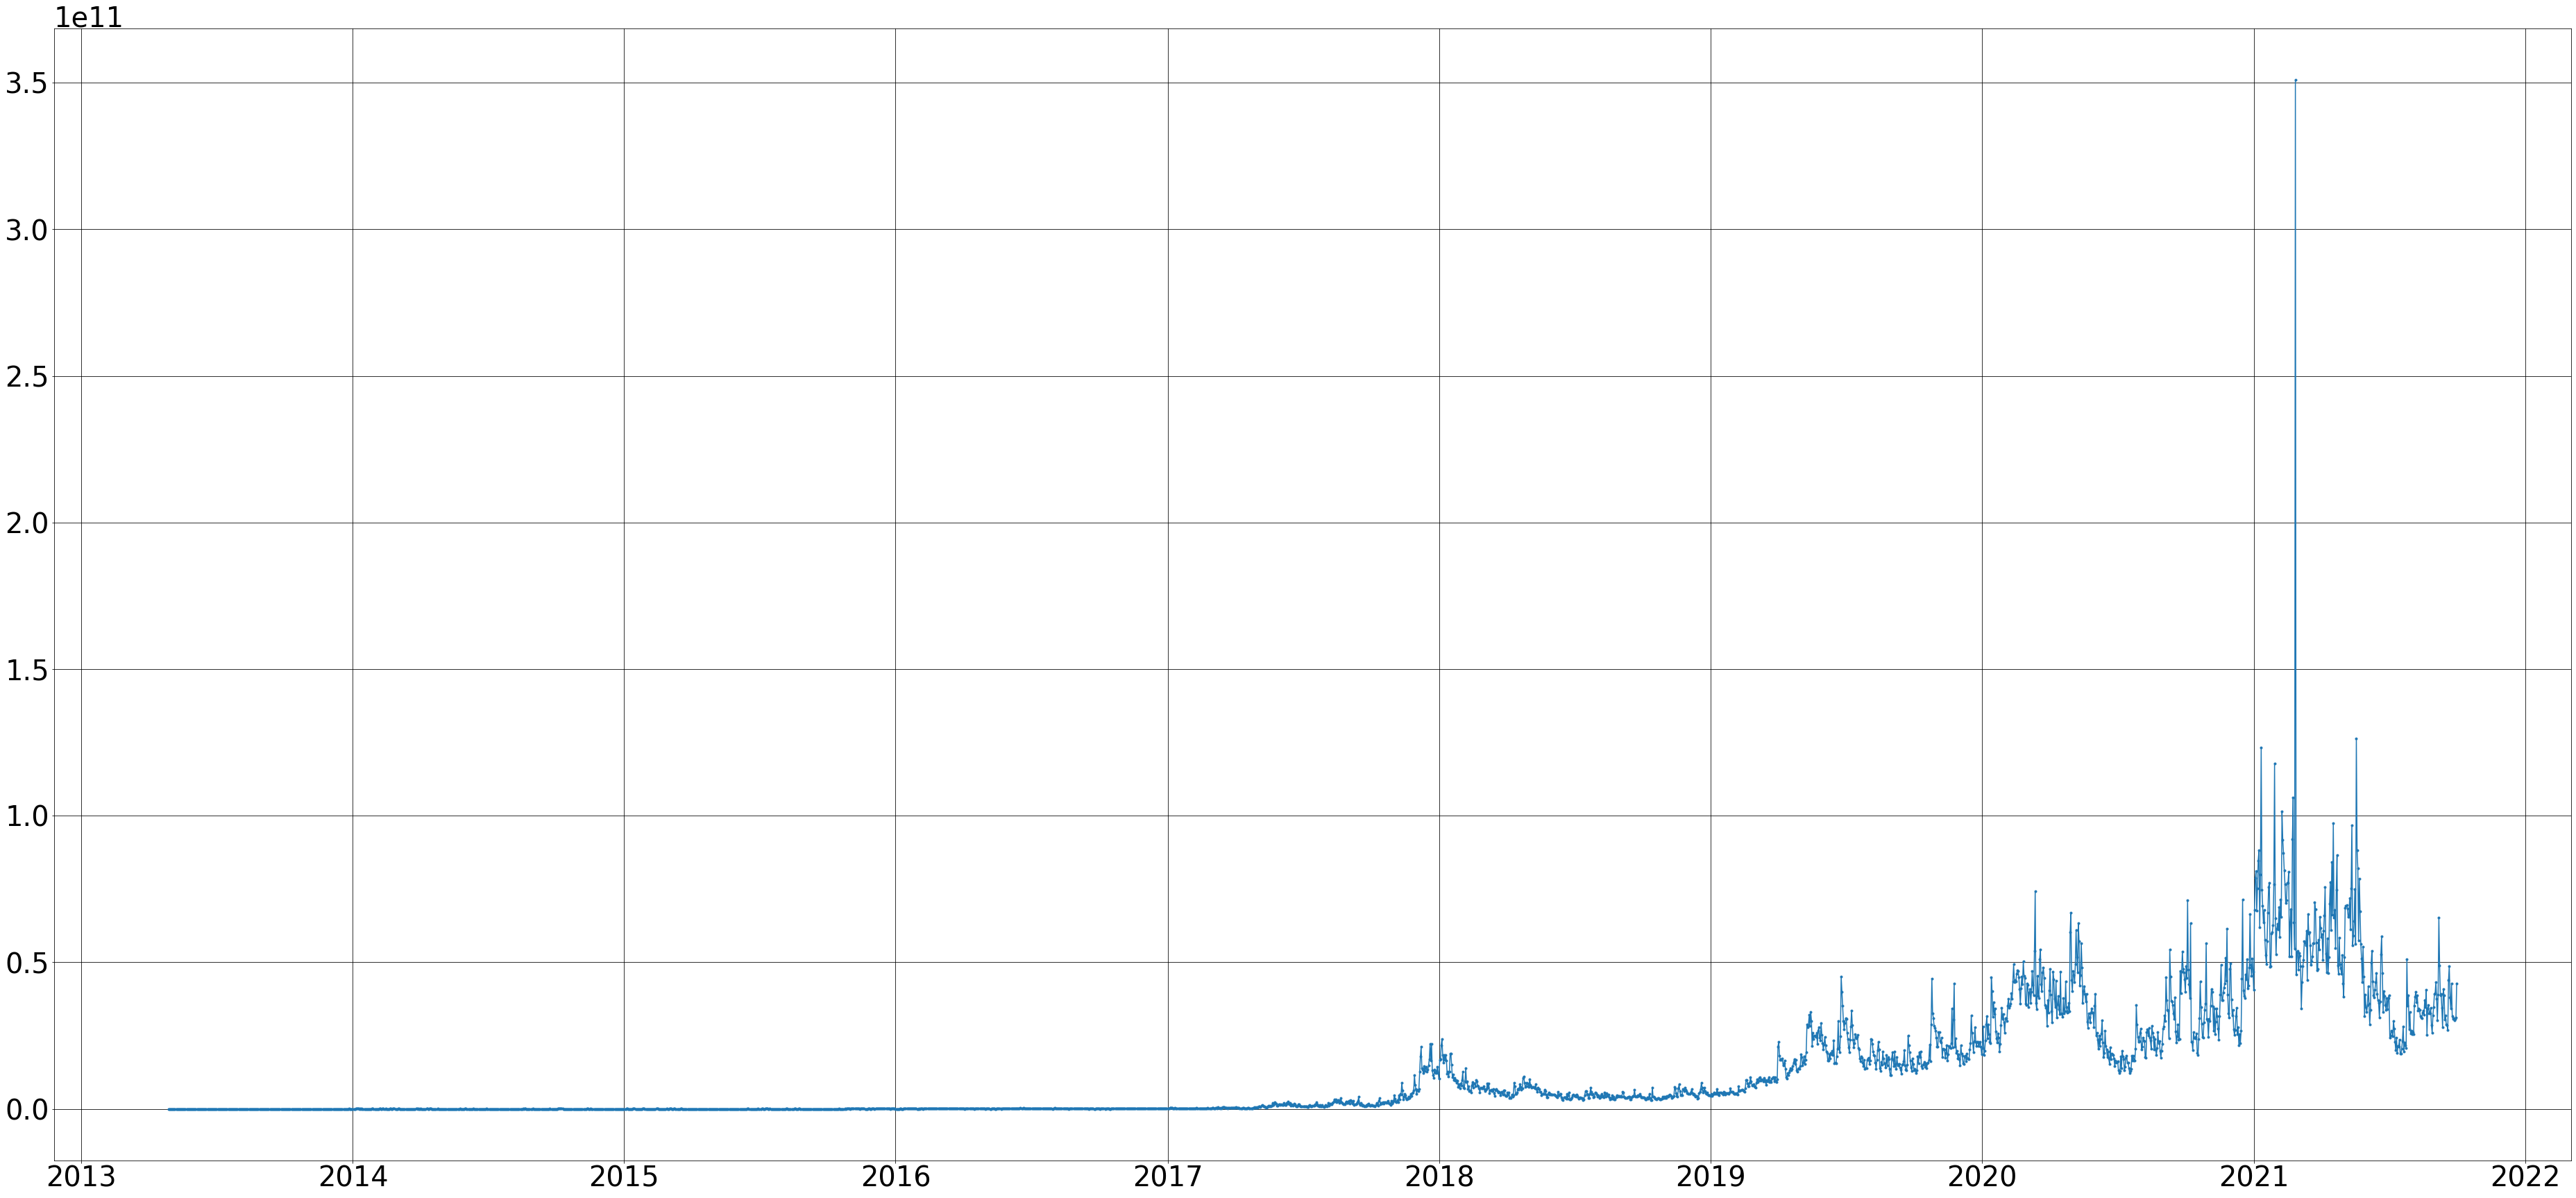

In [16]:
plt.rc('xtick', labelsize=40) 
plt.rc('ytick', labelsize=40) 
plt.figure(figsize = [65,30])
plt.plot(EDA_df,marker='.')
plt.grid(b=True,color='black')

### Let's see one year 

In [17]:
EDA_df=EDA_df.loc[EDA_df.index.year>2020]

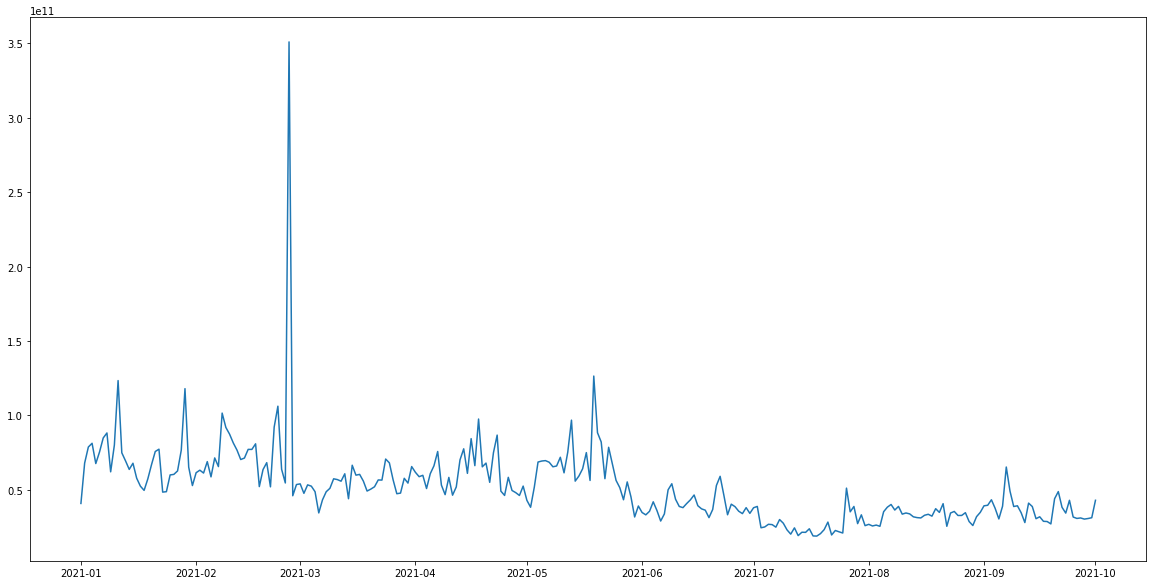

In [18]:
plt.rc('xtick',labelsize=10) 
plt.rc('ytick',labelsize=10) 
plt.figure(figsize = [20,10])
plt.plot(EDA_df)

## Decision: Dropping stock data before 2017 because it will not give important information

In [19]:
#Bitcoin_df=Bitcoin_df.loc[Bitcoin_df['Date'] >= '2017-1-1']
Bitcoin_df.tail(3)

Date  Open_Price  Highest_Price  Lowest_Price  Close_Price  Volume  \
3076 2013-04-30      144.00         146.93        134.05       139.00     0.0   
3077 2013-04-29      134.44         147.49        134.00       144.54     0.0   
3078 2013-04-28      135.30         135.98        132.10       134.21     0.0   

        Market_Cap  
3076  1.542813e+09  
3077  1.603769e+09  
3078  1.488567e+09

## Read data of daily Bitcoin Transacations taken from: https://data.nasdaq.com/data/BCHAIN/NTRAN-bitcoin-number-of-transactions

In [20]:
Bitcion_transaction=pd.read_csv('BCHAIN-NTRAN.csv')
Bitcion_transaction['Date']=pd.to_datetime(Bitcion_transaction['Date'])
Bitcion_transaction.head(7)

Date     Value
0 2021-09-16  271223.0
1 2021-09-15  268957.0
2 2021-09-14  268127.0
3 2021-09-13  255970.0
4 2021-09-12  192691.0
5 2021-09-11  218445.0
6 2021-09-10  261371.0

### Interesting point..Here is the first ten days of bitcoin starting from 2-1-2009 :) 

In [21]:
Bitcion_transaction.tail(10)

Date  Value
4631 2009-01-11   95.0
4632 2009-01-10  106.0
4633 2009-01-09   31.0
4634 2009-01-08   14.0
4635 2009-01-07    0.0
4636 2009-01-06    0.0
4637 2009-01-05    0.0
4638 2009-01-04    0.0
4639 2009-01-03    0.0
4640 2009-01-02    1.0

### Merge Bitcoin Historical Prices Data with Daily Transactions Data into one Data Frame

In [22]:
Bitcoin_df=pd.merge(Bitcoin_df,Bitcion_transaction,on='Date')
Bitcoin_df.rename(columns={'Value':'Daily_Transactions'},inplace=True)

In [23]:
Bitcoin_df.head(7)

Date  Open_Price  Highest_Price  Lowest_Price  Close_Price  \
0 2021-09-16    48158.91       48486.83      47079.56     47783.36   
1 2021-09-15    47098.00       48450.47      46773.33     48176.35   
2 2021-09-14    44960.05       47218.13      44752.33     47092.49   
3 2021-09-13    46057.22       46598.68      43591.32     44963.07   
4 2021-09-12    45206.63       46364.88      44790.46     46063.27   
5 2021-09-11    44869.84       45969.29      44818.27     45201.46   
6 2021-09-10    46396.66       47031.74      44344.49     44883.91   

         Volume    Market_Cap  Daily_Transactions  
0  3.176429e+10  8.991792e+11            271223.0  
1  3.048450e+10  9.065325e+11            268957.0  
2  3.865215e+10  8.860953e+11            268127.0  
3  4.096994e+10  8.459805e+11            255970.0  
4  2.788198e+10  8.666367e+11            192691.0  
5  3.449984e+10  8.503818e+11            218445.0  
6  3.915467e+10  8.443670e+11            261371.0

### Additional Features are taken from https://data.nasdaq.com/data/BCHAIN-blockchain

In [24]:
Bitcoin_more_features=pd.read_csv('Bitcoin_AdditionalFeatures.csv')
Bitcoin_more_features['Date']=Bitcoin_more_features['Date'].str.replace('/','-')
Bitcoin_more_features['Date']=pd.to_datetime(Bitcoin_more_features['Date'], format= '%d-%m-%Y')
Bitcoin_more_features.tail(3)

Date  Miners_Revenue  Difficuly  Cost_Per_Transaction  \
4638 2009-01-04             0.0        0.0                   0.0   
4639 2009-01-03             0.0        0.0                   0.0   
4640 2009-01-02             0.0        1.0                   0.0   

      Average_Block_Size  Total_Bitcoins  \
4638            0.000000            50.0   
4639            0.000000            50.0   
4640            0.000272            50.0   

      Average_Transaction_Confirmation_time  
4638                                    NaN  
4639                                    NaN  
4640                                    NaN

In [25]:
Bitcoin_df=pd.merge(Bitcoin_df,Bitcoin_more_features,on='Date')

In [26]:
Bitcoin_df.tail(3)

Date  Open_Price  Highest_Price  Lowest_Price  Close_Price  Volume  \
3061 2013-04-30      144.00         146.93        134.05       139.00     0.0   
3062 2013-04-29      134.44         147.49        134.00       144.54     0.0   
3063 2013-04-28      135.30         135.98        132.10       134.21     0.0   

        Market_Cap  Daily_Transactions  Miners_Revenue    Difficuly  \
3061  1.542813e+09             50437.0   442507.288000  10076292.88   
3062  1.603769e+09             51776.0   631409.784038  10076292.88   
3063  1.488567e+09             50009.0   645240.091200   8974296.01   

      Cost_Per_Transaction  Average_Block_Size  Total_Bitcoins  \
3061              8.773466            0.159960      11098275.0   
3062             11.861025            0.147566      11098475.0   
3063             12.902479            0.133635      11087150.0   

      Average_Transaction_Confirmation_time  
3061                               9.750000  
3062                              11.116667  
3063                              10.275000

## Now we have 14 Features and 1720 Records starting from Data (28-4-2013) To (16-09-2021)

### No NANS

In [27]:
Bitcoin_df.isna().sum()

Date                                     0
Open_Price                               0
Highest_Price                            0
Lowest_Price                             0
Close_Price                              0
Volume                                   0
Market_Cap                               0
Daily_Transactions                       0
Miners_Revenue                           0
Difficuly                                0
Cost_Per_Transaction                     0
Average_Block_Size                       0
Total_Bitcoins                           0
Average_Transaction_Confirmation_time    0
dtype: int64

## Target Variable to be predicted is Average_Transaction_Confirmation_time

### Check outlier

<AxesSubplot:xlabel='Average_Transaction_Confirmation_time', ylabel='Count'>

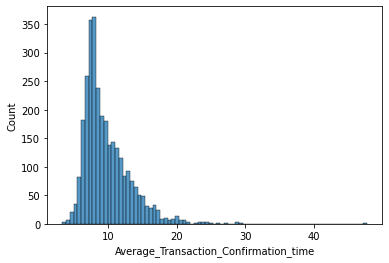

In [28]:
sns.histplot(Bitcoin_df['Average_Transaction_Confirmation_time'])

## Add a new column for date as an integer

In [29]:
def convert_time_to_int(date):
    d=datetime.datetime(date.year,date.month,date.day)
    return calendar.timegm(d.timetuple()) 

In [30]:
Bitcoin_df['Date_As_Int']=Bitcoin_df['Date']
Bitcoin_df['Date_As_Int']=Bitcoin_df['Date_As_Int'].apply(convert_time_to_int)
Bitcoin_df['Date_As_Int'].head(3)

0    1631750400
1    1631664000
2    1631577600
Name: Date_As_Int, dtype: int64

## Add columns for month, year, and day

In [31]:
def get_year(date):
    return date.year

def get_month(date):
    return date.month

def get_day(date):
    return date.day

In [32]:
Bitcoin_df['Year']=Bitcoin_df['Date'].apply(get_year)
Bitcoin_df['Month']=Bitcoin_df['Date'].apply(get_month)
Bitcoin_df['Day']=Bitcoin_df['Date'].apply(get_day)

In [33]:
Bitcoin_df.tail(3)

Date  Open_Price  Highest_Price  Lowest_Price  Close_Price  Volume  \
3061 2013-04-30      144.00         146.93        134.05       139.00     0.0   
3062 2013-04-29      134.44         147.49        134.00       144.54     0.0   
3063 2013-04-28      135.30         135.98        132.10       134.21     0.0   

        Market_Cap  Daily_Transactions  Miners_Revenue    Difficuly  \
3061  1.542813e+09             50437.0   442507.288000  10076292.88   
3062  1.603769e+09             51776.0   631409.784038  10076292.88   
3063  1.488567e+09             50009.0   645240.091200   8974296.01   

      Cost_Per_Transaction  Average_Block_Size  Total_Bitcoins  \
3061              8.773466            0.159960      11098275.0   
3062             11.861025            0.147566      11098475.0   
3063             12.902479            0.133635      11087150.0   

      Average_Transaction_Confirmation_time  Date_As_Int  Year  Month  Day  
3061                               9.750000   1367280000  2013      4   30  
3062                              11.116667   1367193600  2013      4   29  
3063                              10.275000   1367107200  2013      4   28

In [34]:
Bitcoin_df.corr()

Open_Price  Highest_Price  \
Open_Price                               1.000000       0.999485   
Highest_Price                            0.999485       1.000000   
Lowest_Price                             0.998993       0.998921   
Close_Price                              0.998752       0.999457   
Volume                                   0.789560       0.792025   
Market_Cap                               0.998519       0.999161   
Daily_Transactions                       0.384754       0.385010   
Miners_Revenue                           0.937527       0.938211   
Difficuly                                0.788264       0.787155   
Cost_Per_Transaction                     0.909450       0.909287   
Average_Block_Size                       0.570551       0.570745   
Total_Bitcoins                           0.589157       0.588087   
Average_Transaction_Confirmation_time    0.143825       0.144223   
Date_As_Int                              0.693039       0.691891   
Year                                     0.697242       0.696231   
Month                                   -0.097334      -0.098447   
Day                                     -0.011648      -0.011466   

                                       Lowest_Price  Close_Price    Volume  \
Open_Price                                 0.998993     0.998752  0.789560   
Highest_Price                              0.998921     0.999457  0.792025   
Lowest_Price                               1.000000     0.999344  0.783323   
Close_Price                                0.999344     1.000000  0.788215   
Volume                                     0.783323     0.788215  1.000000   
Market_Cap                                 0.999178     0.999751  0.788673   
Daily_Transactions                         0.386231     0.385920  0.492911   
Miners_Revenue                             0.936931     0.937563  0.757268   
Difficuly                                  0.789649     0.788155  0.863549   
Cost_Per_Transaction                       0.908903     0.908708  0.658194   
Average_Block_Size                         0.571141     0.570985  0.630379   
Total_Bitcoins                             0.591267     0.589445  0.628453   
Average_Transaction_Confirmation_time      0.141859     0.143047  0.188096   
Date_As_Int                                0.695317     0.693383  0.725438   
Year                                       0.699210     0.697525  0.734043   
Month                                     -0.094735    -0.096767 -0.140025   
Day                                       -0.012747    -0.012435  0.002792   

                                       Market_Cap  Daily_Transactions  \
Open_Price                               0.998519            0.384754   
Highest_Price                            0.999161            0.385010   
Lowest_Price                             0.999178            0.386231   
Close_Price                              0.999751            0.385920   
Volume                                   0.788673            0.492911   
Market_Cap                               1.000000            0.378963   
Daily_Transactions                       0.378963            1.000000   
Miners_Revenue                           0.930962            0.492608   
Difficuly                                0.789399            0.569863   
Cost_Per_Transaction                     0.902729            0.263770   
Average_Block_Size                       0.565685            0.909295   
Total_Bitcoins                           0.584060            0.873969   
Average_Transaction_Confirmation_time    0.137060            0.086709   
Date_As_Int                              0.689377            0.823311   
Year                                     0.693574            0.817857   
Month                                   -0.096897           -0.025162   
Day                                     -0.012330           -0.016346   

                                       Miners_Revenue  Difficuly  \
Open_Price                

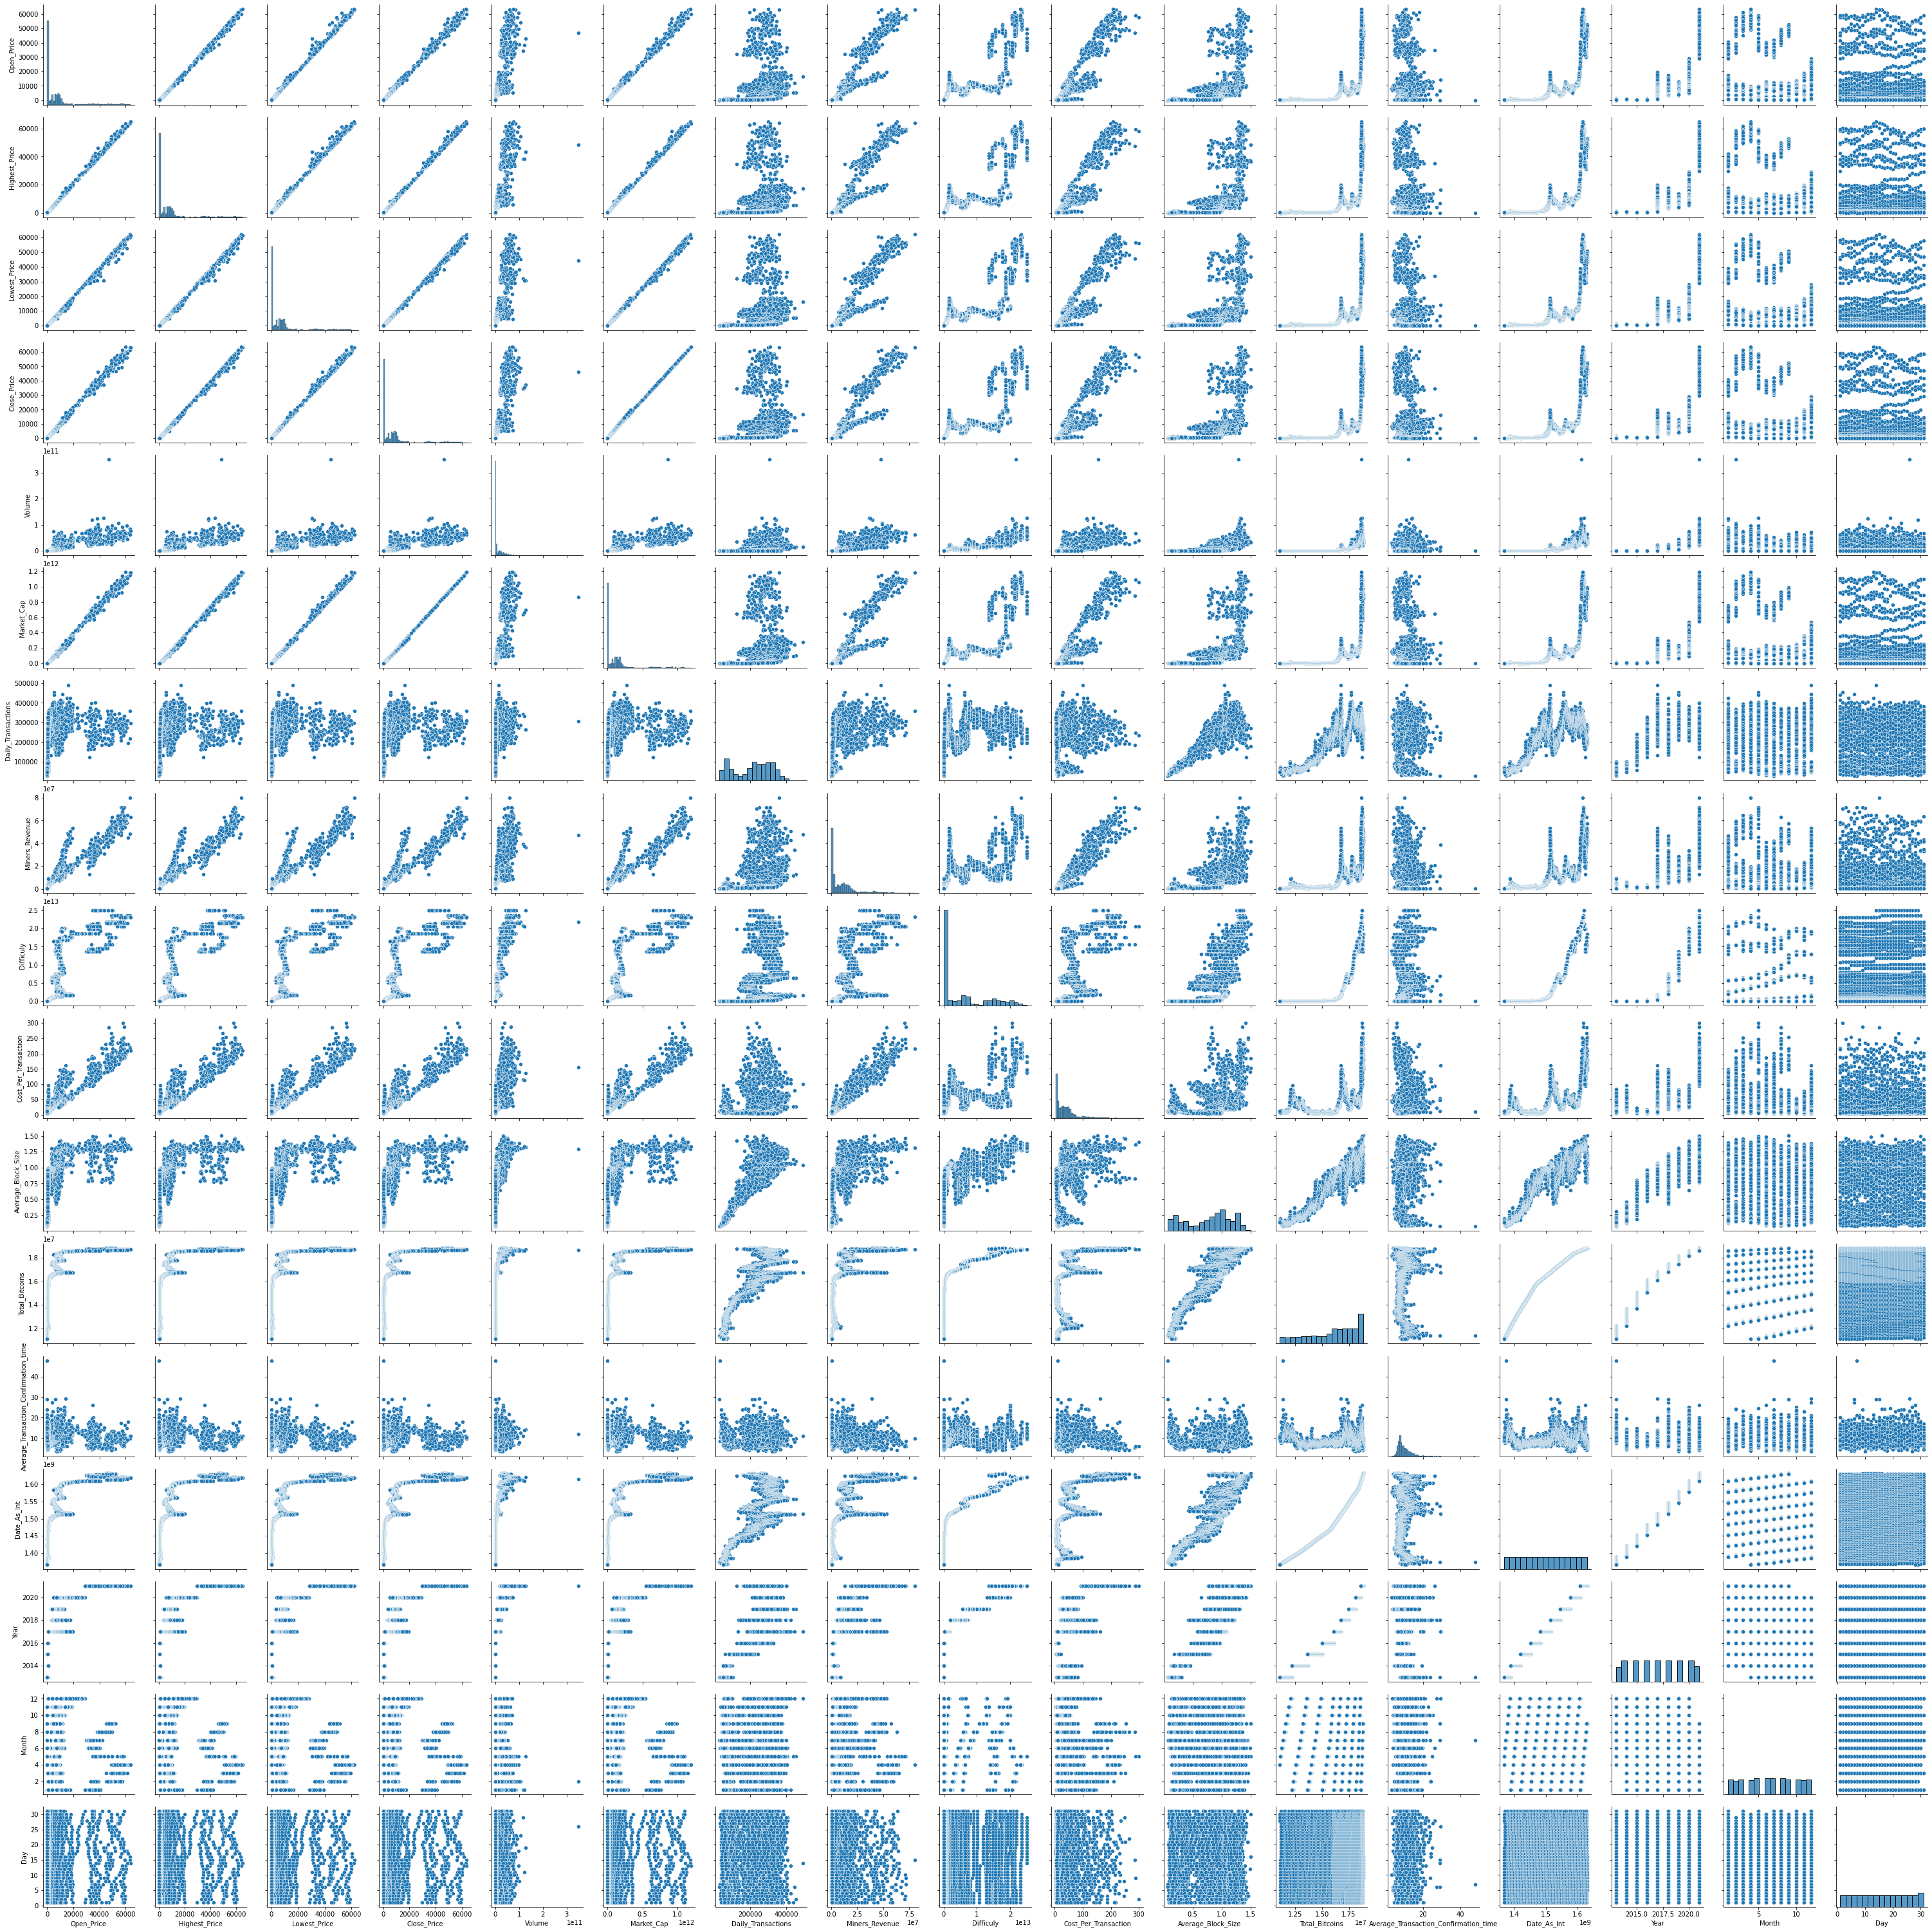

In [35]:
sns.pairplot(Bitcoin_df)

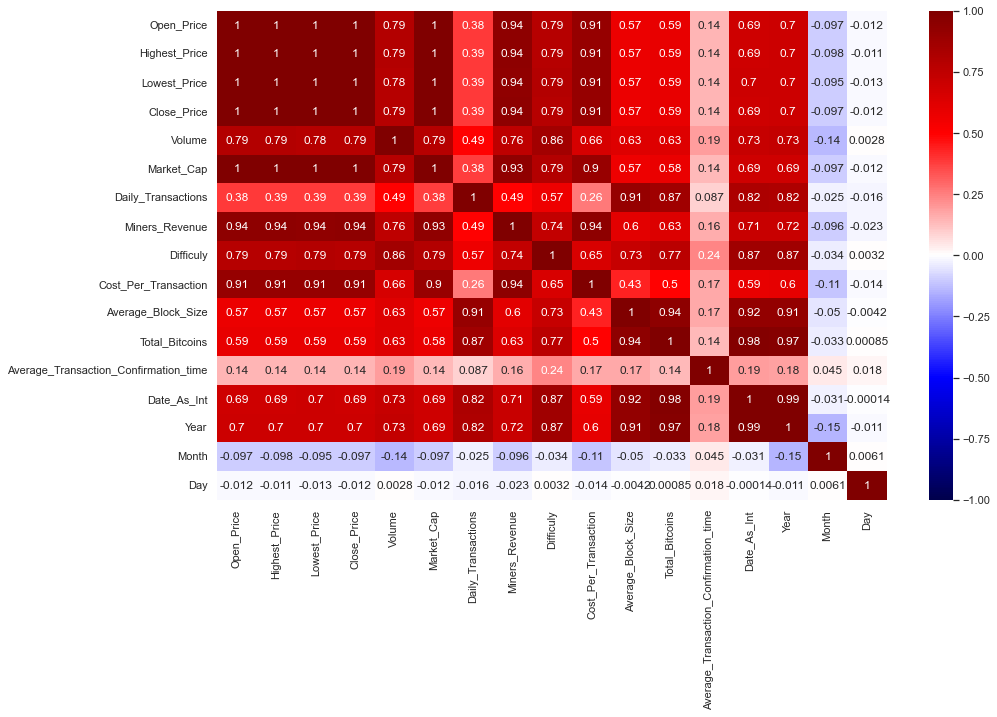

In [43]:
sns.set(rc={'figure.figsize':(15,9)})
sns.heatmap(Bitcoin_df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

## Pandas Profiling

In [44]:
#To be added

## Splitting Data

In [83]:
X=Bitcoin_df.drop(['Average_Transaction_Confirmation_time','Date','Open_Price','Highest_Price','Lowest_Price','Close_Price'],axis=1)
Y=Bitcoin_df['Average_Transaction_Confirmation_time']

train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.4,random_state=10)

In [84]:
train_X

Volume    Market_Cap  Daily_Transactions  Miners_Revenue  \
1752  6.851110e+07  1.178066e+10            294140.0    1.388629e+06   
1797  3.903540e+07  1.016981e+10            210448.0    1.135930e+06   
524   4.362284e+10  1.257555e+11            288585.0    1.436868e+07   
142   4.944822e+10  1.028733e+12            298109.0    5.718209e+07   
2499  5.894500e+07  5.678829e+09             88631.0    1.452599e+06   
...            ...           ...                 ...             ...   
2009  8.352860e+07  6.447468e+09            208319.0    1.535746e+06   
1180  4.566910e+09  1.056466e+11            158022.0    1.322542e+07   
1344  1.653410e+10  2.251787e+11            337959.0    4.013637e+07   
527   4.424348e+10  1.314093e+11            312770.0    1.573546e+07   
1289  8.797910e+09  1.684797e+11            213978.0    2.115751e+07   

         Difficuly  Cost_Per_Transaction  Average_Block_Size  Total_Bitcoins  \
1752  2.818009e+11              4.940000            0.900000     16014975.00   
1797  2.585227e+11              5.580000            0.780000     15931287.50   
524   1.471521e+13             49.790116            0.900077     18316987.50   
142   2.358198e+13            191.816045            1.316657     18692993.75   
2499  3.960367e+10             16.389291            0.341989     13495475.00   
...            ...                   ...                 ...             ...   
2009  1.584272e+11              7.264439            0.746762     15328300.00   
1180  5.077499e+12             84.712326            0.484737     17112112.50   
1344  1.931136e+12            122.358755            1.057117     16797012.50   
527   1.391252e+13             49.799384            1.137403     18311237.50   
1289  3.290606e+12             98.794856            1.022322     16906187.50   

      Date_As_Int  Year  Month  Day  
1752   1480377600  2016     11   29  
1797   1476489600  2016     10   15  
524    1586476800  2020      4   10  
142    1619481600  2021      4   27  
2499   1415836800  2014     11   13  
...           ...   ...    ...  ...  
2009   1458172800  2016      3   17  
1180   1529798400  2018      6   24  
1344   1515628800  2018      1   11  
527    1586217600  2020      4    7  
1289   1520380800  2018      3    7  

[1838 rows x 12 columns]

In [85]:
train_X,val_X,train_y,val_y=train_test_split(train_X,train_y,test_size=0.2,random_state=19)

## Baseline Model

In [86]:
lm=LinearRegression()

# Fit the model to the full dataset
lm.fit(train_X, train_y)

# Print out the R^2 for the model against the full dataset
print('training score ',lm.score(train_X,train_y))
print('testing score ',lm.score(val_X,val_y))

training score  0.1791944075826104
testing score  0.16479060793698153


In [87]:
 ## Experiment 2: Scale 
scaler=StandardScaler()

# Fit the model to the full dataset


train_X_scaled=scaler.fit_transform(train_X)
val_X_Scaled=scaler.transform(val_X)



lm=LinearRegression()

# Fit the model to the full dataset
lm.fit(train_X_scaled, train_y)


# Print out the R^2 for the model against the full dataset
print('training score ',lm.score(train_X_scaled,train_y))
print('testing score ',lm.score(val_X_Scaled,val_y))

training score  0.17919440758281857
testing score  0.16479060793405087


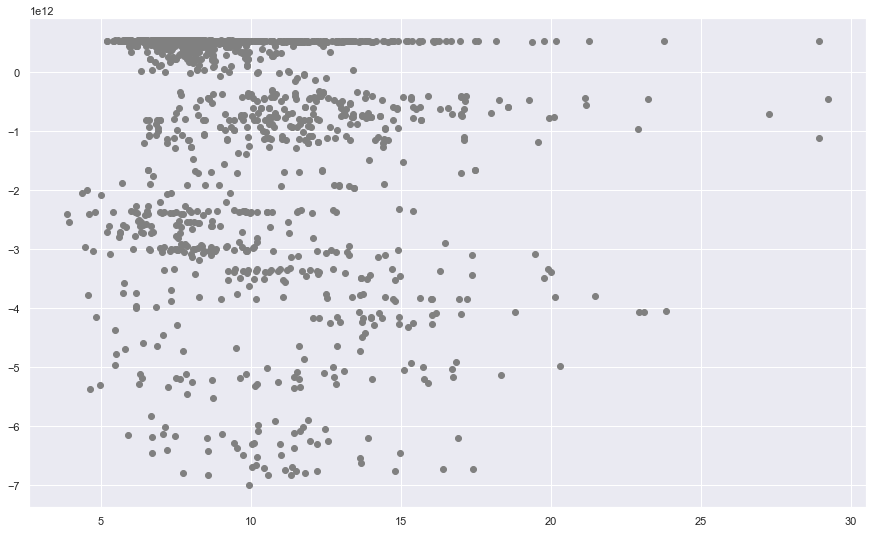

In [88]:
plt.scatter(train_y, lm.predict(train_X), color='grey')
plt.show()

### Trying polynomials

In [89]:
# Experiment 3
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(train_X)
X_poly_val = poly_reg.fit_transform(val_X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, train_y)


print('training score ',pol_reg.score(X_poly,train_y))
print('testing score ',pol_reg.score(X_poly_val,val_y))

training score  0.4882213119818182
testing score  0.41261375039643794


In [90]:
# Experiment 4

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(train_X)
X_poly_val = poly_reg.fit_transform(val_X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, train_y)


print('training score ',pol_reg.score(X_poly,train_y))
print('testing score ',pol_reg.score(X_poly_val,val_y))

training score  0.4492735800685015
testing score  0.3015885859232875


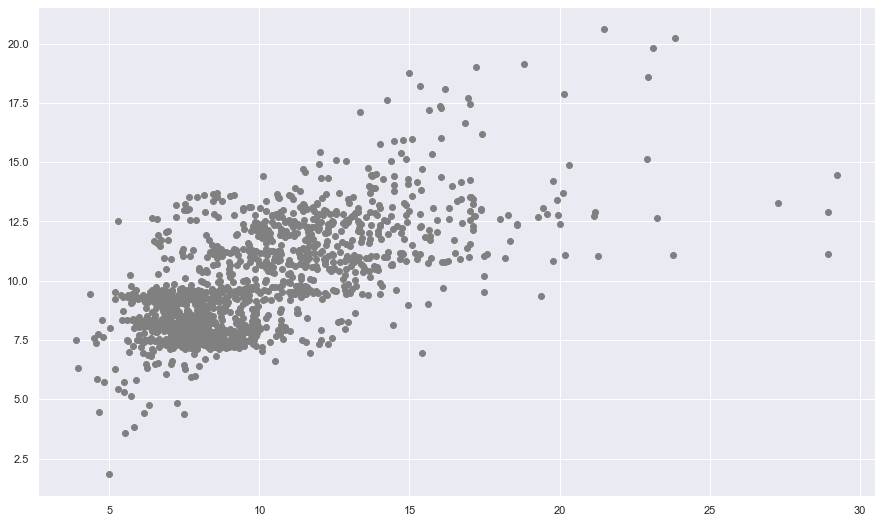

In [91]:
plt.scatter(train_y, pol_reg.predict(X_poly), color='grey')
plt.show()

In [92]:
# Experiment 5


poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(train_X)
X_poly_val = poly_reg.fit_transform(val_X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, train_y)


print('training score ',pol_reg.score(X_poly,train_y))
print('testing score ',pol_reg.score(X_poly_val,val_y))

training score  0.36452252615146064
testing score  0.22178336321436087


In [93]:
# Experiment 6
from sklearn import preprocessing

train_X=preprocessing.normalize(train_X)

poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(train_X)
X_poly_val = poly_reg.fit_transform(val_X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, train_y)


print('training score ',pol_reg.score(X_poly,train_y))
print('testing score ',pol_reg.score(X_poly_val,val_y))


training score  0.3905698321881004
testing score  -1.1663894333485928e+102


## Conclusion: Experiment 3 had highest accuracy in predicting unseen data 